In [155]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [114]:
names = pd.read_csv(
    'player_data.csv')
names.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [109]:
name = names[['name', 'year_start', 'college']]
name.head()

,name,year_start,college
0,Alaa Abdelnaby,1991,Duke University
1,Zaid Abdul-Aziz,1969,Iowa State University
2,Kareem Abdul-Jabbar,1970,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,Louisiana State University
4,Tariq Abdul-Wahad,1998,San Jose State University


In [134]:
count_colledge = name.groupby('year_start').count().reset_index()
count_colledge.head()

,year_start,name,college
0,1947,161,151
1,1948,40,37
2,1949,94,91
3,1950,120,117
4,1951,30,30


In [ ]:
Построим график показывающий количество колледжей поставляших игроков в лигу по годам

<BarContainer object of 72 artists>

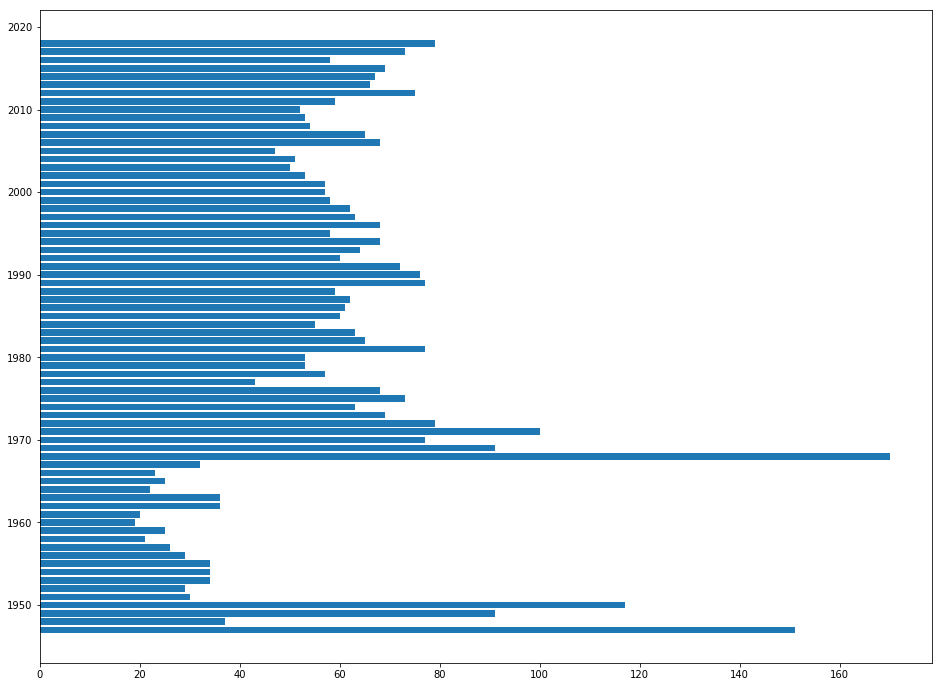

In [156]:
plt.barh(count_colledge['year_start'], count_colledge['college'])

In [ ]:
На графике ввидно, что в разные годы разное количество колледжей поставляли игроков в лигу. Есть несколько лет 
с максимальным количеством колледжей свыше 100

In [90]:
import seaborn as sns

In [ ]:
2. как год начала карьеры влияет на квалификацию играков. С 50 годов профессионализм временно игроков падал, но потом возобновил свой рост.

In [223]:
nba = pd.read_csv(
    'player_data.csv')
nba.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [226]:
from datetime import datetime, timedelta
from pandas import Series, DataFrame

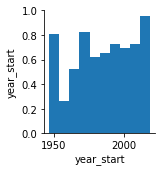

In [80]:
sns_plot = sns.pairplot(
    nba[['year_start', 'position']])
sns_plot

In [ ]:
3.Первые графики были построены с помощью Seaborn, на них видно, что с годами рост начинающих спортсменов становиться
все больше и больше

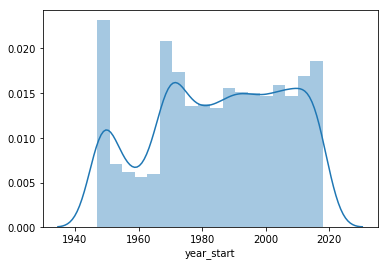

In [17]:
sns.distplot(nba.year_start)

In [ ]:
Награфике ыидо, что в 50 и 60 годы мало людей начинали свою карьеру в баскетболе.
Это связано, что в те времена на пике популярности был бокс.

In [ ]:
3. box plot среднего веса спортсменов на начало карьеры 

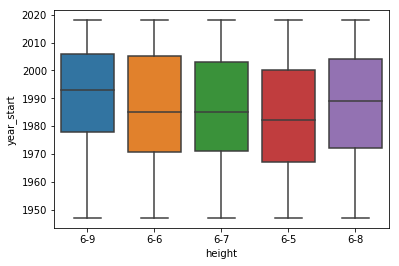

In [131]:
top_height= nba.height.value_counts().sort_values(ascending = False).head(5).index.values
top_height
sns.boxplot(x="height", y="year_start", 
            data=nba[nba.height.isin(top_height)])

In [ ]:
Мы видим что в 90 годы вес спортсмемов был самым максимальным. Потом он понемногу снижался, 
а теперь снова спортсмены становятся тяжелее. 

In [198]:
nba_pos = nba[['name', 'year_start', 'position', 'birth_date']]
nba_pos.head()

,name,year_start,position,birth_date
0,Alaa Abdelnaby,1991,F-C,"June 24, 1968"
1,Zaid Abdul-Aziz,1969,C-F,"April 7, 1946"
2,Kareem Abdul-Jabbar,1970,C,"April 16, 1947"
3,Mahmoud Abdul-Rauf,1991,G,"March 9, 1969"
4,Tariq Abdul-Wahad,1998,F,"November 3, 1974"


In [229]:
count_start_date = nba_pos.groupby('position').count().reset_index()
count_start_date.head()

,position,name,year_start,birth_date
0,C,502,502,499
1,C-F,219,219,218
2,F,1290,1290,1274
3,F-C,388,388,388
4,F-G,216,216,213


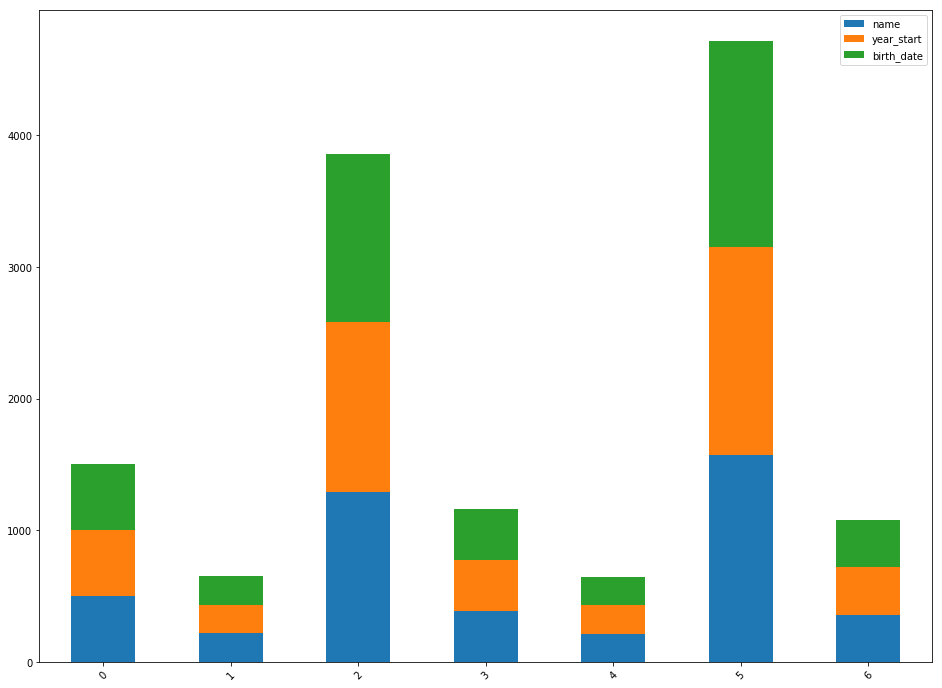

In [234]:
count_start_date[list(filter(lambda x: x != 'position', count_start_date.columns))]\
    .plot(kind='bar', rot=45, stacked=True)

In [ ]:
На графике показаны соотношение и позиций баскетболистов от года старат и рождения